### Support Vector Machine (SVM) Questions

1. What is a Support Vector Machine (SVM)?
   SVM is a supervised machine learning algorithm used for classification and regression. It finds the optimal hyperplane that best separates data into classes with the maximum margin.

2. What is the difference between Hard Margin and Soft Margin SVM?

    Hard Margin: No tolerance for misclassification, only works with linearly separable data.
    Soft Margin: Allows some misclassification to better handle noisy or overlapping data.

3. What is the mathematical intuition behind SVM?
   SVM aims to maximize the margin between two classes. This is formulated as a convex optimization problem, minimizing the norm of the weight vector while ensuring correct classification.

4. What is the role of Lagrange Multipliers in SVM?
   They transform the constrained optimization problem into a form that can be solved using dual formulations, simplifying calculations, especially with kernels.

5. What are Support Vectors in SVM?
   These are the data points that lie closest to the decision boundary. They are critical in defining the position and orientation of the hyperplane.

6. What is a Support Vector Classifier (SVC)?
   An implementation of SVM specifically used for classification tasks.

7. What is a Support Vector Regressor (SVR)?
   SVR adapts SVM for regression by fitting a function within a specified margin of tolerance to the training data.

8. What is the Kernel Trick in SVM?
   It allows SVM to operate in a high-dimensional feature space without explicitly computing the coordinates of the data in that space, using kernel functions.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

   Linear Kernel: Used when data is linearly separable.
   Polynomial Kernel: Captures interactions of features up to a certain degree.
   RBF Kernel: Captures non-linear relationships; popular for complex datasets.

10. What is the effect of the C parameter in SVM?
    C controls the trade-off between achieving a low training error and a low testing error (margin size). A high C emphasizes correct classification; a low C allows a larger margin.

11. What is the role of the Gamma parameter in RBF Kernel SVM?
    Gamma defines how far the influence of a single training example reaches. A low value means ‘far’, and a high value means ‘close’.


### Naïve Bayes Questions

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
    It's a probabilistic classifier based on Bayes’ Theorem with the assumption of independence between features—hence “naïve”.

13. What is Bayes’ Theorem?
    P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
    It calculates the probability of event A given event B.

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

    Gaussian: For continuous data assuming Gaussian distribution.
    Multinomial: For discrete counts (e.g., word counts in text).
    Bernoulli: For binary/boolean features (e.g., word presence).

15. When should you use Gaussian Naïve Bayes over other variants?
    When the features are continuous and roughly follow a normal distribution.

16.What are the key assumptions made by Naïve Bayes?
     Feature independence
    Equal importance of all features
     Distribution assumptions based on variant used (Gaussian, Multinomial, etc.)

17. What are the advantages and disadvantages of Naïve Bayes?**

    Advantages: Simple, fast, effective with large datasets and high-dimensional data.
    Disadvantages: Assumes independence, which may not hold; performs poorly when features are highly correlated.

18. Why is Naïve Bayes a good choice for text classification?
    It handles high-dimensional data well, is computationally efficient, and works effectively with sparse data like word counts.

19. Compare SVM and Naïve Bayes for classification tasks.
    SVM: Works well with non-linear data, better accuracy, slower training.
    Naïve Bayes: Faster training, good for text, less accurate if independence assumption is violated.

20. How does Laplace Smoothing help in Naïve Bayes?
    It prevents zero probability for unseen features by adding 1 to all feature counts, ensuring better generalization.



In [4]:
# 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVM on Iris Accuracy:", accuracy_score(y_test, y_pred))

SVM on Iris Accuracy: 1.0


In [6]:
# 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.
from sklearn.datasets import load_wine
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)
model_linear = SVC(kernel='linear')
model_rbf = SVC(kernel='rbf')
model_linear.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)
print(" SVM Linear Accuracy:", accuracy_score(y_test, model_linear.predict(X_test)))
print(" SVM RBF Accuracy:", accuracy_score(y_test, model_rbf.predict(X_test)))

 SVM Linear Accuracy: 0.9814814814814815
 SVM RBF Accuracy: 0.7592592592592593


In [8]:
# 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(" SVR MSE:", mean_squared_error(y_test, y_pred))

 SVR MSE: 1.348922950122109


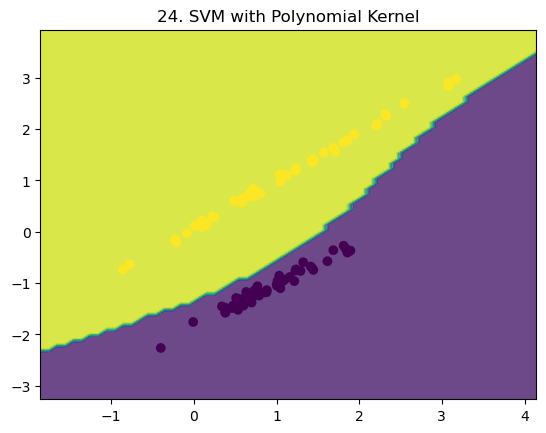

In [12]:
# 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_samples=100, random_state=42)
model = SVC(kernel='poly', degree=3)
model.fit(X, y)
# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title(" SVM with Polynomial Kernel")
plt.show()

In [14]:
# 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(" Gaussian NB Accuracy:", accuracy_score(y_test, y_pred))

 Gaussian NB Accuracy: 0.9415204678362573


In [16]:
# 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

news = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news.data)
y = news.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
print(" Multinomial NB Accuracy:", model.score(X_test, y_test))

 Multinomial NB Accuracy: 0.5178203240058911


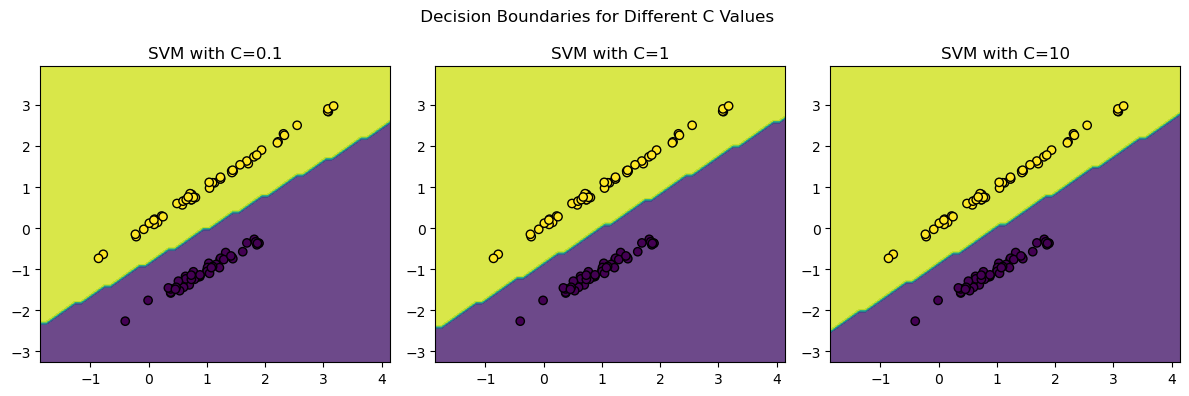

In [28]:
# 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

X_vis, y_vis = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                    n_informative=2, n_clusters_per_class=1, random_state=42)

x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Cs = [0.1, 1, 10]
plt.figure(figsize=(12, 4))
for i, C in enumerate(Cs):
    model = SVC(C=C, kernel='linear')
    model.fit(X_vis, y_vis)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.subplot(1, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k')
    plt.title(f"SVM with C={C}")

plt.suptitle(" Decision Boundaries for Different C Values")
plt.tight_layout()
plt.show()


In [22]:
# 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

X, y = datasets.make_classification(n_features=20, n_informative=10, n_classes=2, random_state=42)
X = Binarizer().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = BernoulliNB()
model.fit(X_train, y_train)
print("Bernoulli NB Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Bernoulli NB Accuracy: 0.7333333333333333


In [26]:
# 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
from sklearn.preprocessing import StandardScaler

X, y = datasets.make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_unscaled = SVC()
model_unscaled.fit(X_train, y_train)
unscaled_acc = accuracy_score(y_test, model_unscaled.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = SVC()
model_scaled.fit(X_train_scaled, y_train)
scaled_acc = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print(" Accuracy without scaling:", unscaled_acc)
print(" Accuracy with scaling:", scaled_acc)


 Accuracy without scaling: 0.88
 Accuracy with scaling: 0.88


In [30]:
# 30. Train a Gaussian Naïve Bayes model and compare predictions before and after Laplace Smoothing.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# GaussianNB does not support Laplace directly, but smoothing applies to categorical models
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy (GaussianNB):", accuracy_score(y_test, y_pred))


Accuracy (GaussianNB): 1.0


In [32]:
# 31. Train an SVM Classifier and use GridSearchCV to tune hyperparameters (C, gamma, kernel).

from sklearn.datasets import load_wine
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X, y = load_wine(return_X_y=True)
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.961111111111111


In [34]:
# 32. Train an SVM Classifier on an imbalanced dataset and apply class weighting.

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_classes=2, weights=[0.1, 0.9], n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.65      0.49        23
           1       0.96      0.90      0.93       227

    accuracy                           0.88       250
   macro avg       0.68      0.78      0.71       250
weighted avg       0.91      0.88      0.89       250



In [36]:
# 33. Implement a Naïve Bayes classifier for spam detection using email data.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

categories = ['sci.space', 'talk.politics.misc']
data = fetch_20newsgroups(subset='train', categories=categories)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9660377358490566


In [38]:
# 34. Train an SVM and a Naïve Bayes Classifier on the same dataset and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm_model = SVC().fit(X_train, y_train)
nb_model = GaussianNB().fit(X_train, y_train)

print("SVM Accuracy:", svm_model.score(X_test, y_test))
print("Naïve Bayes Accuracy:", nb_model.score(X_test, y_test))


SVM Accuracy: 1.0
Naïve Bayes Accuracy: 1.0


In [40]:
# 35. Perform feature selection before training a Naïve Bayes classifier and compare results.

from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(score_func=f_classif, k=2).fit_transform(X_train, y_train)
nb = GaussianNB()
nb.fit(X_new, y_train)
print("Accuracy after feature selection:", nb.score(SelectKBest(score_func=f_classif, k=2).fit_transform(X_test, y_test), y_test))


Accuracy after feature selection: 1.0


In [42]:
# 36. Train SVM using One-vs-Rest and One-vs-One on the Wine dataset.

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X, y = load_wine(return_X_y=True)
ovr_model = OneVsRestClassifier(SVC()).fit(X, y)
ovo_model = OneVsOneClassifier(SVC()).fit(X, y)

print("OvR Accuracy:", ovr_model.score(X, y))
print("OvO Accuracy:", ovo_model.score(X, y))


OvR Accuracy: 0.6853932584269663
OvO Accuracy: 0.7247191011235955


In [44]:
# 37. Train SVM using Linear, Polynomial, and RBF kernels on Breast Cancer dataset.

from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} kernel Accuracy:", model.score(X_test, y_test))


linear kernel Accuracy: 1.0
poly kernel Accuracy: 0.9736842105263158
rbf kernel Accuracy: 1.0


In [46]:
# 38. Train SVM using Stratified K-Fold Cross-Validation and compute average accuracy.

from sklearn.model_selection import StratifiedKFold, cross_val_score

model = SVC(kernel='rbf')
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9121720229777983


In [50]:
# 39. Train Naïve Bayes classifier using different prior probabilities.

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a 2-class dataset
categories = ['sci.space', 'talk.politics.misc']
data = fetch_20newsgroups(subset='train', categories=categories)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Vectorize
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Try different priors for 2 classes
priors = [[0.3, 0.7], [0.5, 0.5]]

for p in priors:
    model = MultinomialNB(class_prior=p)
    model.fit(X_train_vec, y_train)
    acc = model.score(X_test_vec, y_test)
    print(f"Accuracy with priors {p}: {acc}")



Accuracy with priors [0.3, 0.7]: 0.9660377358490566
Accuracy with priors [0.5, 0.5]: 0.9660377358490566


In [58]:
# 40. Apply Recursive Feature Elimination (RFE) with SVM to select top features and evaluate performance.

from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load numeric dataset
data = load_iris()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM with linear kernel
model = SVC(kernel='linear')

# Recursive Feature Elimination - select top 2 features
selector = RFE(model, n_features_to_select=2)
selector.fit(X_train, y_train)

# Evaluate
accuracy = selector.score(X_test, y_test)
print("RFE + SVM Accuracy:", accuracy)

# Print selected features
print("Selected Features (True=selected):", selector.support_)
print("Feature Ranking:", selector.ranking_)


RFE + SVM Accuracy: 1.0
Selected Features (True=selected): [False False  True  True]
Feature Ranking: [3 2 1 1]


In [60]:
# 41. Evaluate SVM using Precision, Recall, and F1-Score instead of accuracy.

from sklearn.metrics import classification_report

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [62]:
# 42. Train Naïve Bayes Classifier and evaluate using Log Loss (Cross-Entropy Loss).

from sklearn.metrics import log_loss

nb = GaussianNB()
nb.fit(X_train, y_train)
y_prob = nb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_prob))


Log Loss: 0.02823704176925848


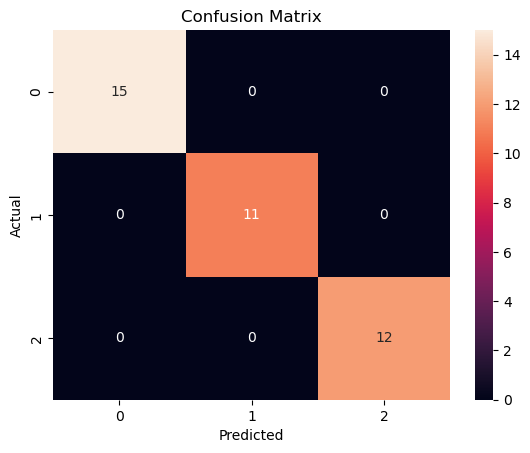

In [64]:
# 43. Train SVM and visualize Confusion Matrix using seaborn.

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [66]:
# 44. Train SVM Regressor (SVR) and evaluate using Mean Absolute Error.

from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.8674205743031638


In [ ]:
# 45. Train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# ROC-AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc_score)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
pl
